# RD curve quantizing a frame

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab
import math
import numpy as np
from scipy import signal
import cv2
import os

In [3]:
def quantizer(x, quantization_step):
    k = (x / quantization_step).astype(np.int16)
    return k

def dequantizer(k, quantization_step):
    y = quantization_step * k
    return y

def q_deq(x, quantization_step):
    k = quantizer(x, quantization_step)
    y = dequantizer(k, quantization_step)
    return k, y

# Notice that, although this is a dead-zone quantizer, we are not going
# to work with negative samples, and therefore, the dead-zone
# does not have any effect.

In [4]:
def load_frame(prefix):
    fn = f"{prefix}.png"
    frame = cv2.imread(fn, cv2.IMREAD_UNCHANGED) # [rows, cols, comp]
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = np.array(frame)
    frame = frame.astype(np.float32) - 32768.0
    frame = frame.astype(np.uint8)
    return frame

def write_frame(frame, prefix):
    frame = frame.astype(np.float32)
    frame += 32768.0
    frame = frame.astype(np.uint16)
    cv2.imwrite(f"{prefix}.png", frame)

In [8]:
def load_indexes(prefix):
    load_frame(prefix)
    
def write_indexes(prefix):
    write_frame(prefix)

In [9]:
fn = "/home/fdgongora/Escritorio/Master/1erTrimestre/TecnologiasMultimedia/Milestones/Milestone3/GIT/MRVC/sequences/stockholm/000"
frame = load_frame(fn)
print(frame.max(), frame.min())
print(frame)

255 0
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [10]:
def normalize(img):
    max_component = np.max(img)
    min_component = np.min(img)
    max_min_component = max_component - min_component
    return (img-min_component)/max_min_component

def show_frame(frame, prefix):
    frame = normalize(frame)
    plt.figure(figsize=(10,10))
    plt.title(prefix, fontsize=20)
    plt.imshow(frame)

255 0


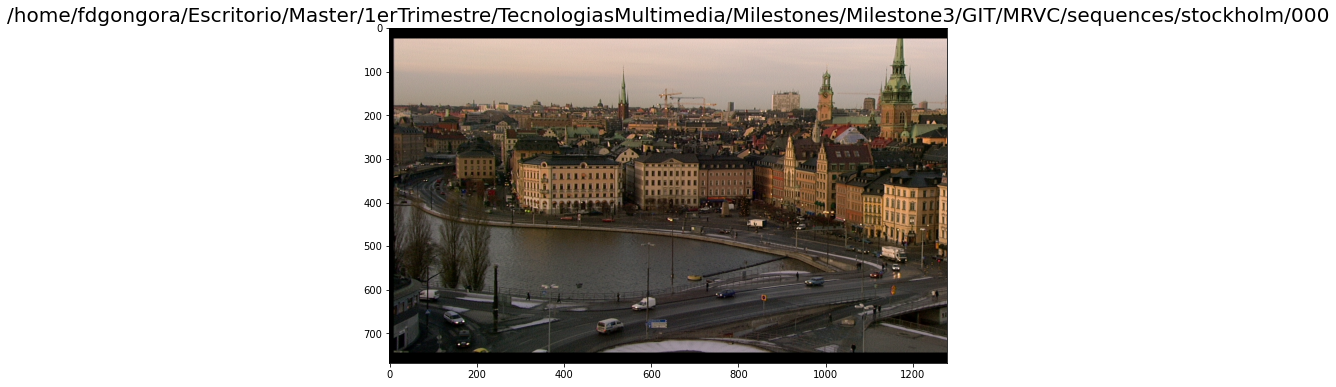

In [11]:
show_frame(frame, fn)
print(frame.max(), frame.min())

In [12]:
def average_energy(x):
    return np.sum(x.astype(np.double)*x.astype(np.double))/len(x)

def RMSE(x, y):
    error_signal = x - y
    return math.sqrt(average_energy(error_signal))

In [13]:
def byte_rate(frame):
    write_frame(frame, "/tmp/frame")
    length_in_bytes = os.path.getsize("/tmp/frame.png")
    return length_in_bytes

In [14]:
def RD_curve(x):
    points = []
    for q_step in range(0, 8):
        print(q_step, end=' ')
        k, y = q_deq(x, 1<<q_step)
        rate = byte_rate(k)
        distortion = RMSE(x, y)
        points.append((rate, distortion))
    return points

RD_points = RD_curve(frame)

0 1 2 3 4 5 6 7 

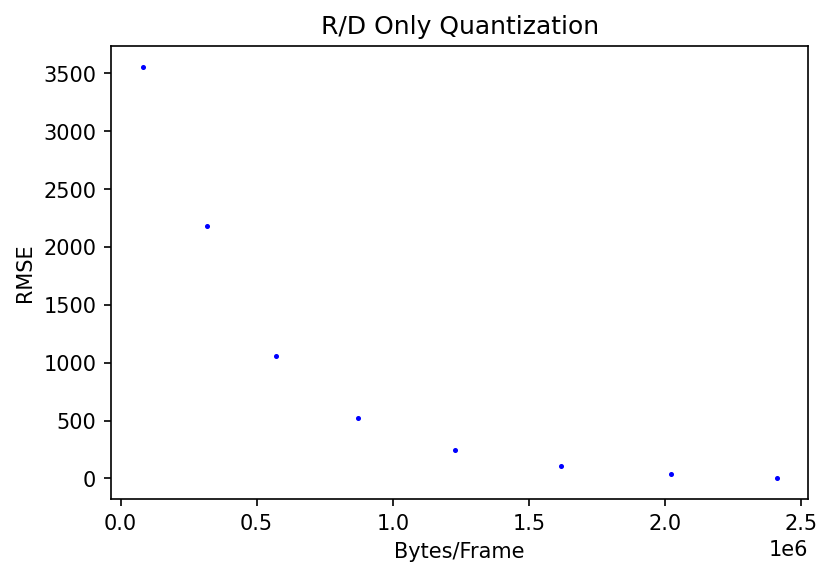

In [15]:
pylab.figure(dpi=150)
pylab.scatter(*zip(*RD_points), s=2, c='b', marker="o")
pylab.title("R/D Only Quantization")
pylab.xlabel("Bytes/Frame")
pylab.ylabel("RMSE")
pylab.show()

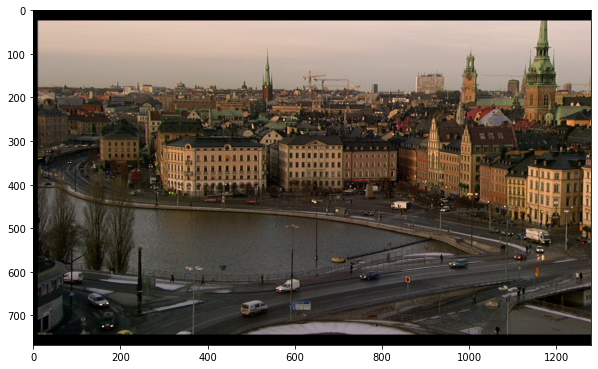

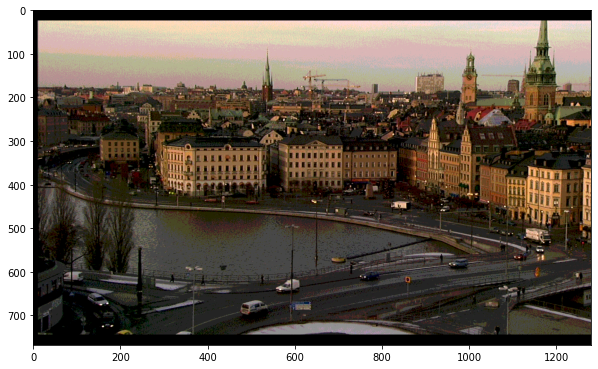

In [19]:
k, y = q_deq(frame, 2)
show_frame(y, "")
k, y = q_deq(frame, 32)
show_frame(y, "")
